# Analyzing results of one experiment.
### Finding std of std and mean
### plotting the predictions
### plotting kde
### KS test

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt


In [2]:
from src.RQ1_forecast import *

In [3]:
num_samples = 100

In [4]:
data_address1 = '/home/dev/deepts/experiments/deep_factor/electricity/2B'

# Forecast section

## Load data

In [5]:
# read the forcast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1)

101it [00:00, 28104.87it/s]
100%|###########| 100/100 [01:12<00:00,  1.38it/s]


In [6]:
len(forcast_list1)

100

In [7]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1)

In [8]:
sorted_forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2014-05-26 20:00:00,9.0,505.86108,504.97730,521.54650,492.14124,492.89496,512.22156,...,512.24740,496.06590,504.02914,497.71713,484.02557,488.70970,0,499.402603,9.547608,0.212979
1,1,0,2014-05-26 21:00:00,10.0,506.65875,515.79645,517.89996,514.08890,530.19696,505.63520,...,503.19107,507.30606,504.45220,518.76140,517.29474,505.87600,0,510.931723,9.591647,0.201569
2,1,0,2014-05-26 22:00:00,22.0,502.94740,530.68910,519.56660,524.77136,528.47064,529.80640,...,517.80975,526.24615,530.19360,513.48680,537.14730,525.66876,0,522.892894,8.619235,0.206831
3,1,0,2014-05-26 23:00:00,20.0,520.26020,528.12616,508.16740,541.16660,542.58746,536.85345,...,532.06510,545.03930,525.35535,534.75340,538.92285,541.91280,0,535.284142,9.604379,0.202637
4,1,0,2014-05-27 00:00:00,13.0,582.09430,578.30383,576.72675,587.22340,570.98000,596.89870,...,582.86530,600.14404,567.47125,581.05980,585.84600,573.85657,0,586.259989,8.987228,0.214819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53923,1,2246,2014-06-02 15:00:00,4209.0,251.71835,276.58765,263.53214,261.48322,285.64470,265.40695,...,255.91766,269.59125,254.94566,253.57750,258.69220,263.15625,320,263.102931,8.895277,0.220816
53924,1,2246,2014-06-02 16:00:00,4120.0,260.28720,262.18810,256.23870,260.72092,259.24835,256.67810,...,285.36470,282.60880,255.93584,258.08276,272.21277,256.42250,320,265.465086,10.003711,0.200177
53925,1,2246,2014-06-02 17:00:00,3951.0,279.59045,270.02954,290.49890,268.53460,264.98053,259.03848,...,268.69696,279.94160,263.37616,269.50946,260.06903,301.06393,320,270.857128,10.330990,0.177463
53926,1,2246,2014-06-02 18:00:00,3907.0,279.01620,274.59607,268.33810,268.96704,274.85910,280.46320,...,274.93768,283.09558,266.38184,283.92136,289.20627,272.73975,320,274.697426,8.917567,0.232794


## get each time series individually

In [9]:
target_forcast_series = get_forcast_target(forcast_list1)

In [10]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)

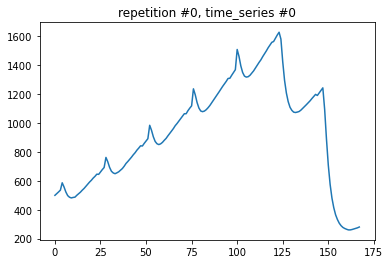

In [11]:
# plot mean of only one time series
rep_no = 0
plt.title(f'repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()

## plot the kde for experiments

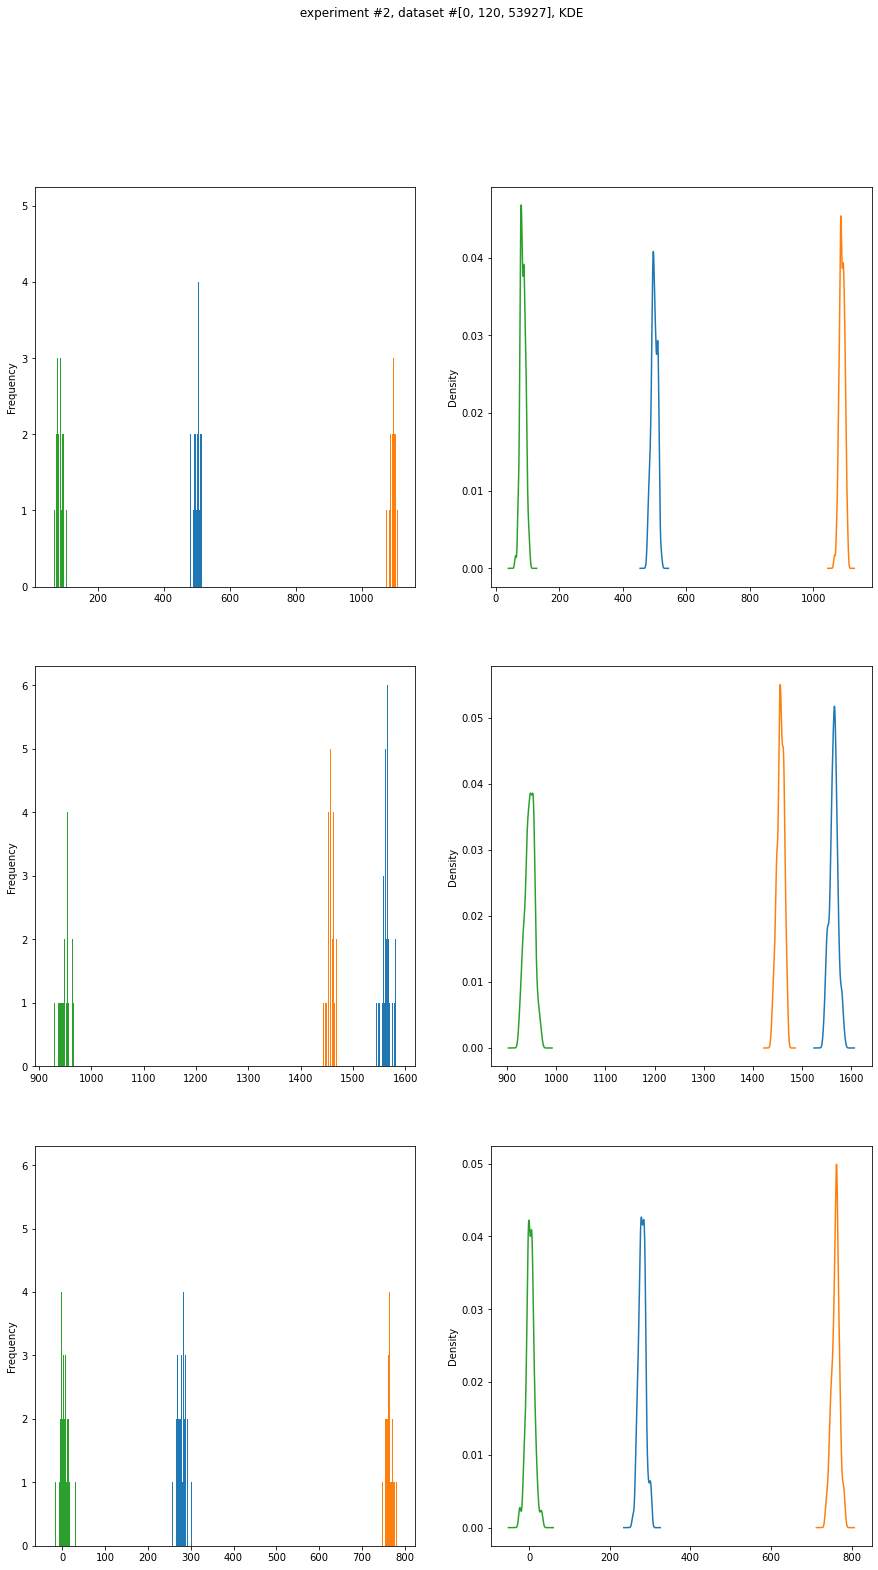

In [12]:
data_n = [0, 120, 53927]
max_shape = 3 # number of experiments that are going to be plotted
plot_kde_hist(data_n, max_shape, sorted_forcast_list1)

## std of mean and std over time

In [13]:
## calculate the std over different repetitions
forecast_distrib_df1 = get_forcast_distrib(forcast_list1)
# convert the list of dataframes to a 3d np
forecast_np = get_np_forcast(forecast_distrib_df1)
# get std over different experiments
forecast_std_np = get_std_np(forecast_np, forecast_distrib_df1)
df_std_forecast = pd.DataFrame(forecast_std_np)
df_std_forecast.rename(index={0:'mean',1:'sigma'}, inplace=True)

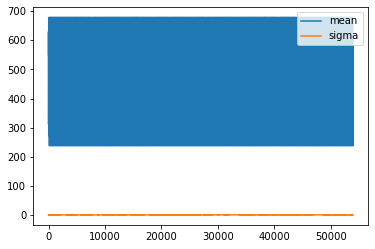

In [14]:
df_std_forecast.T.plot()

## plot samples of experimets

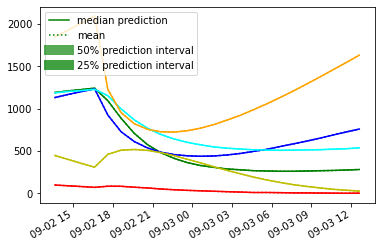

In [15]:
sample_forcast_list1 = get_forcast_samples(forcast_list1)
tmp_n = 53736
plot_forscast_same(sample_forcast_list1, tmp_n, lim=5)

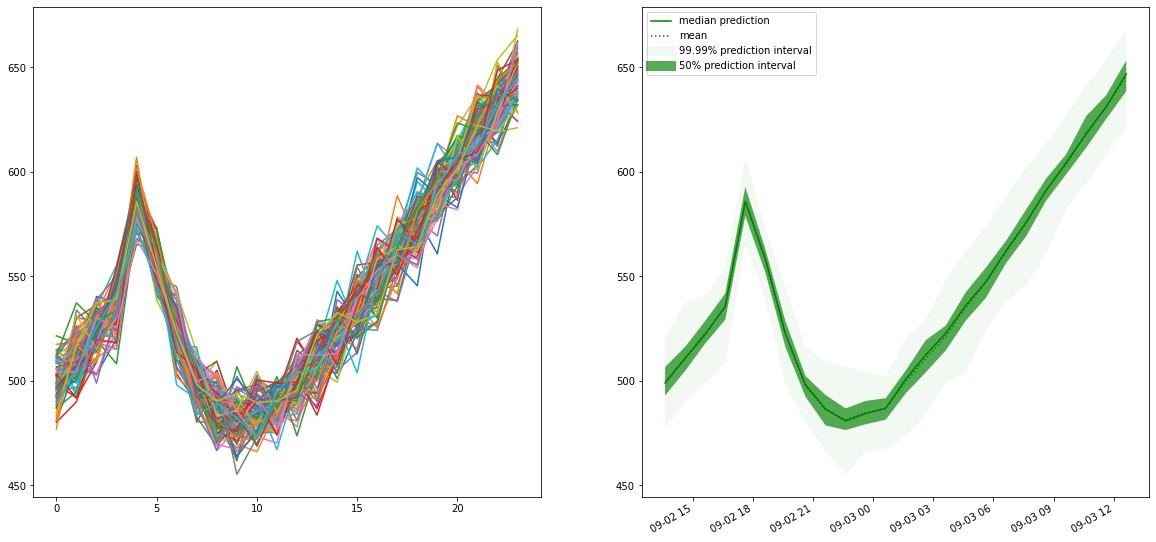

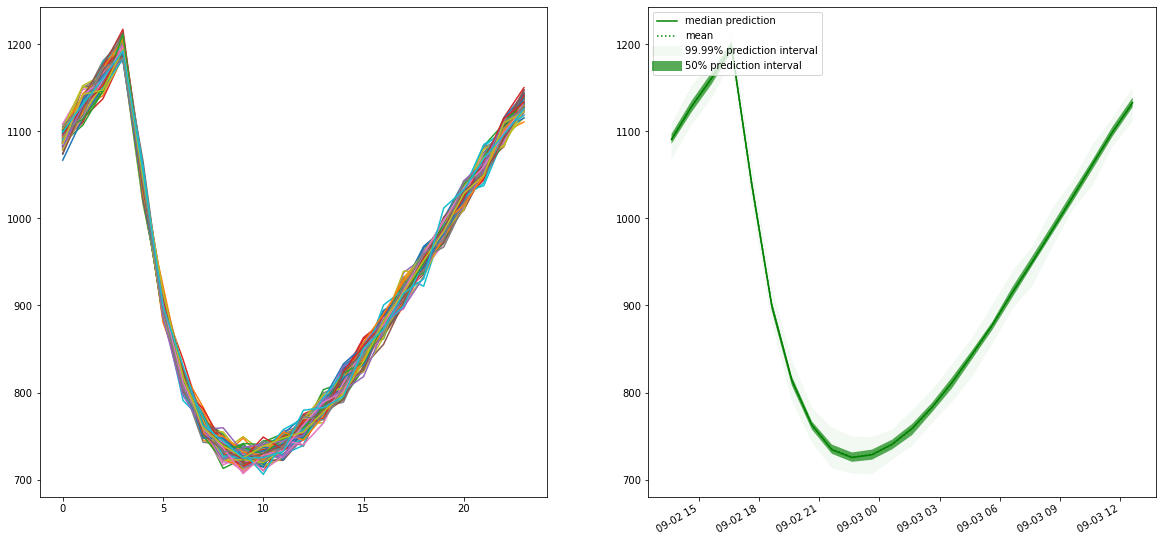

In [16]:
time_point_no = 0
rep_lim = 2
save_plot_exp(sample_forcast_list1, rep_lim, time_point_no)

## KS Test

In [17]:
# we set the datapoint to 4
data_n_el = 4

# make some samples to visualize
exp_n = 0
sample0 = sample_forcast_list1[exp_n][data_n_el]

exp_n = 90
sample90 = sample_forcast_list1[exp_n][data_n_el]

exp_n = 91
sample91 = sample_forcast_list1[exp_n][data_n_el]

In [21]:
# calculate the table of ks tests for each time points
data_point = 1000
ks_table = get_ks_tmp(sample_forcast_list1, data_point)

In [22]:
ks_table

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [23]:
# calculate the proportion of true/all for upper triangle of the table
portion_ks_table(ks_table)

0.008888888888888889

As it is apparant for tmp=12 the ks test gave us good results. however, for tmp=1000 it is not the case

In [24]:
# now we can loop through all 53000 time points and output the results
# try it for first 1000 points
tmp_lim = 100

portion_array = np.zeros(tmp_lim)

for data_point in range(tmp_lim):
    ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
    portion_array[data_point]= portion_ks_table(ks_table)
    print(data_point)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

Text(0.5, 1.0, 'first day of time series #3')

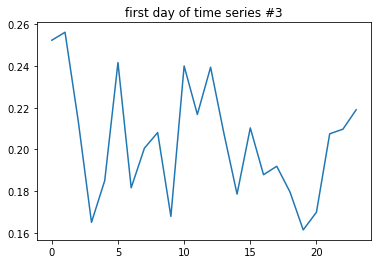

In [66]:
i = 3
plt.plot(portion_array[i*168: (i)*168 + 24])
plt.title(f'first day of time series #{i}')

Text(0.5, 1.0, 'time series #2')

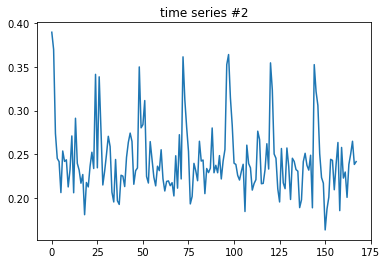

In [68]:
i = 2
plt.plot(portion_array[i*168 : (i+1)*168])
plt.title(f'time series #{i}')

Text(0.5, 1.0, 'all time series')

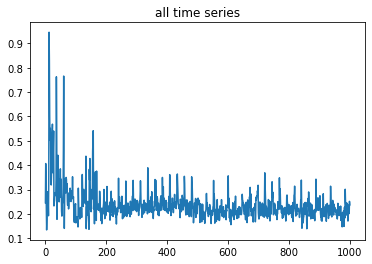

In [69]:
plt.plot(portion_array)
plt.title('all time series')